In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Load MERRA2 dataset
uvt_data = xr.open_mfdataset("MERRA2/[UVT].1980.daily.nc")
dtdtlwr_data = xr.open_mfdataset("MERRA2/DTDTLWR.1980.daily.nc")

In [3]:
dtdtlwr_data

<xarray.Dataset>
Dimensions:  (time: 7, lon: 360, lat: 181, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 1980-01-07T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * level    (level) float64 1e+03 975.0 950.0 925.0 900.0 ... 4.0 3.0 2.0 1.0
Data variables:
    DTDTLWR  (time, level, lat, lon) float32 dask.array<chunksize=(7, 37, 181, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jan 02 14:12:54 2025: cdo seldate,1980-01-01,1980-01-07...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [4]:
# Prepare coordinates
xlon = uvt_data['lon'].values
# latitude has to be in ascending order
ylat = uvt_data['lat'].values
# pressure level has to be in descending order (ascending height)
plev = uvt_data['level'].values

nlon = xlon.size
nlat = ylat.size
nlev = plev.size
print(f"nlon: {nlon}, nlat: {nlat}, nlev:{nlev}")


nlon: 360, nlat: 181, nlev:37


# Plot utilities

In [5]:
def lat_lon_graph_plot(lat_lon_var, graph_title):
    plt.figure(figsize=(12,3))
    plt.contourf(xlon, ylat[-80:], lat_lon_var[-80:, :], cmap='jet')
    plt.axhline(y=0, c='w', lw=20)
    plt.ylabel('Latitude (deg)')
    plt.xlabel('Longitude (deg)')
    plt.colorbar()
    plt.title(graph_title)
    plt.show()

# Calculate LWA fluxes and diabatic heating term using `QGDataset`

In [6]:
from falwa.xarrayinterface import QGDataset
from falwa.oopinterface import QGFieldNHN22

qgds = QGDataset(uvt_data, qgfield=QGFieldNHN22)

uvtinterp = qgds.interpolate_fields()
refstates = qgds.compute_reference_states()

ncforce = qgds.compute_ncforce_from_heating_rate(heating_rate=dtdtlwr_data['DTDTLWR'])
lwadiags  = qgds.compute_lwa_and_barotropic_fluxes(ncforce=ncforce)

Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
Do scipy interpolation
 nlon, nlat, kmax, jd
         360         181          49          91
num of nan in fawa: 2.


## Visualize barotropic components of `convergence_zonal_advective_flux` and `ncforce`

In [7]:
convergence_zonal_advective_flux = qgds.convergence_zonal_advective_flux.isel(time=0)
ncforce_baro = qgds.ncforce_baro.isel(time=0)

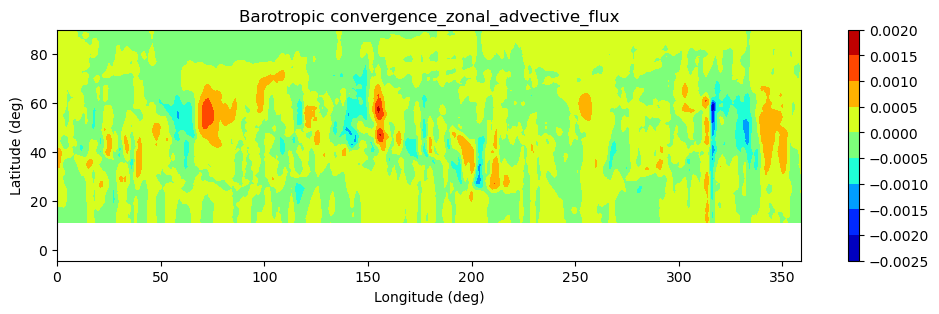

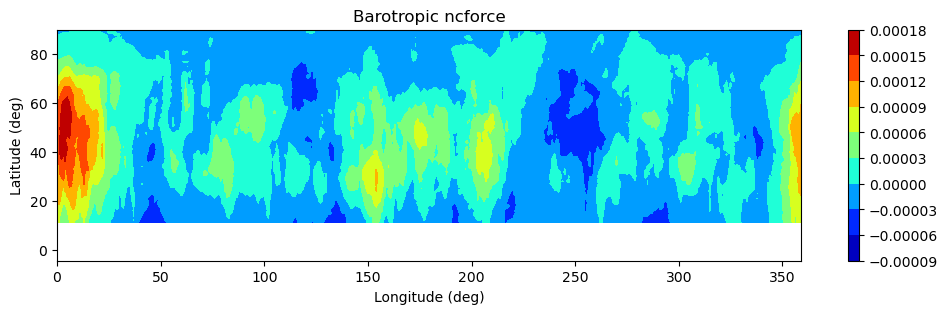

In [8]:
lat_lon_graph_plot(
    convergence_zonal_advective_flux, 
    f"Barotropic convergence_zonal_advective_flux")
lat_lon_graph_plot(
    ncforce_baro, 
    f"Barotropic ncforce")